# Cr-Ni-Ti

In [1]:
import os
import matplotlib.pyplot as plt
from pycalphad import Database, variables as v
from analysis_runner import run_simulation, plot_figure, EquilibriumSamplingPointsGenerator

T_liquid = 2200  # temperature where everything is liquid
potentials = {v.N: 1, v.T: (1000, T_liquid, 10), v.P: 101325}  # for equilibrium calculations
ngridpts = 41  # number of points along each dimension of the composition grid
tolerance_deleterious_phases = 0.10  # Maximum tolerance for deleterious phases
OUTDIR = 'figures'

# Global setup
plt.style.use('papers.mplstyle')
try:
    os.mkdir(OUTDIR)
except FileExistsError:
    pass


In [2]:
dbf = Database(os.path.join('..', 'databases', 'Cr-Ni-Ti huang2018.tdb'))
comps = ['CR', 'NI', 'TI', 'VA']
phases = list(dbf.phases.keys())
allowed_phases = ['LIQUID', 'BCC_A2', 'FCC_A1', 'HCP_A3']  # phases that are okay to have (non-deleterious)
liquid_phase_name = 'LIQUID'
points_generator = EquilibriumSamplingPointsGenerator(dbf, comps, phases)

In [3]:
compositions_list, equilibrium_results, scheil_results = run_simulation(dbf, comps, phases, potentials, ngridpts, T_liquid, points_generator=points_generator, show_progress=True)

Generating points... 

/Users/brandon/Projects/Calphad/pycalphad/pycalphad/core/lower_convex_hull.py:145: RuntimeWarning: invalid value encountered in double_scalars
  result_array_GM_values[it.multi_index] = new_energy / molesum


Done.
(1/861) - {X_CR: 0.0, X_NI: 0.0} - Equilibrium time =  12.85 s - Scheil time =  47.26 s 
(2/861) - {X_CR: 0.025, X_NI: 0.0} - Equilibrium time =  13.47 s - Scheil time =  48.70 s 
(3/861) - {X_CR: 0.05, X_NI: 0.0} - Equilibrium time =  12.33 s - Scheil time =  43.96 s 
(4/861) - {X_CR: 0.075, X_NI: 0.0} - Equilibrium time =  11.54 s - Scheil time =  41.06 s 
(5/861) - {X_CR: 0.1, X_NI: 0.0} - Equilibrium time =  12.70 s - Scheil time =  40.29 s 
(6/861) - {X_CR: 0.125, X_NI: 0.0} - Equilibrium time =  11.79 s - Scheil time =  39.09 s 
(7/861) - {X_CR: 0.15, X_NI: 0.0} - Equilibrium time =  12.20 s - Scheil time =  38.47 s 
(8/861) - {X_CR: 0.175, X_NI: 0.0} - Equilibrium time =  11.95 s - Scheil time =  38.19 s 
(9/861) - {X_CR: 0.2, X_NI: 0.0} - Equilibrium time =  11.08 s - Scheil time =  37.59 s 
(10/861) - {X_CR: 0.225, X_NI: 0.0} - Equilibrium time =  11.88 s - Scheil time =  37.43 s 
(11/861) - {X_CR: 0.25, X_NI: 0.0} - Equilibrium time =  11.90 s - Scheil time =  39.96 s 


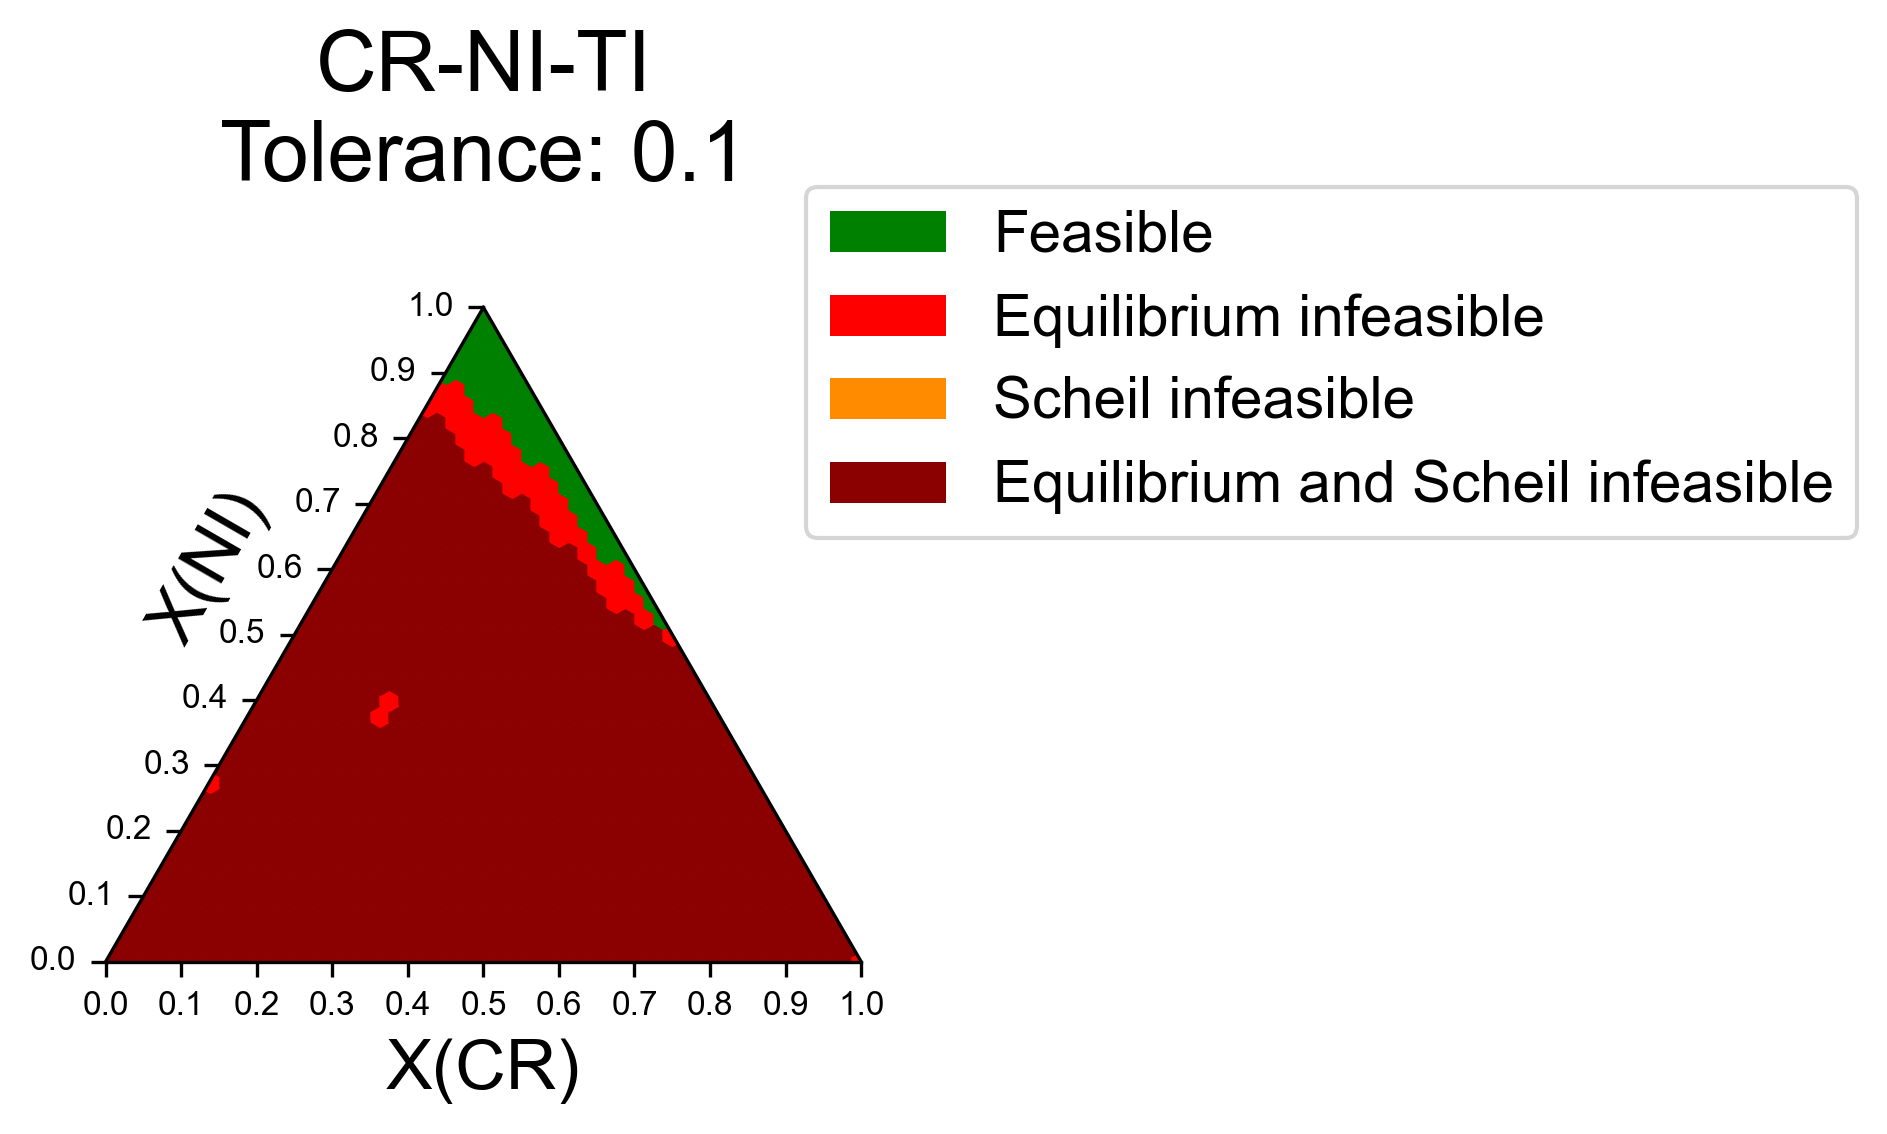

In [11]:
ax = plot_figure(comps, compositions_list, equilibrium_results, scheil_results, allowed_phases, tolerance_deleterious_phases)

# ax.figure.savefig(os.path.join(OUTDIR, f"{'-'.join(sorted(set(comps) - {'VA'}))}.pdf"), bbox_inches='tight')

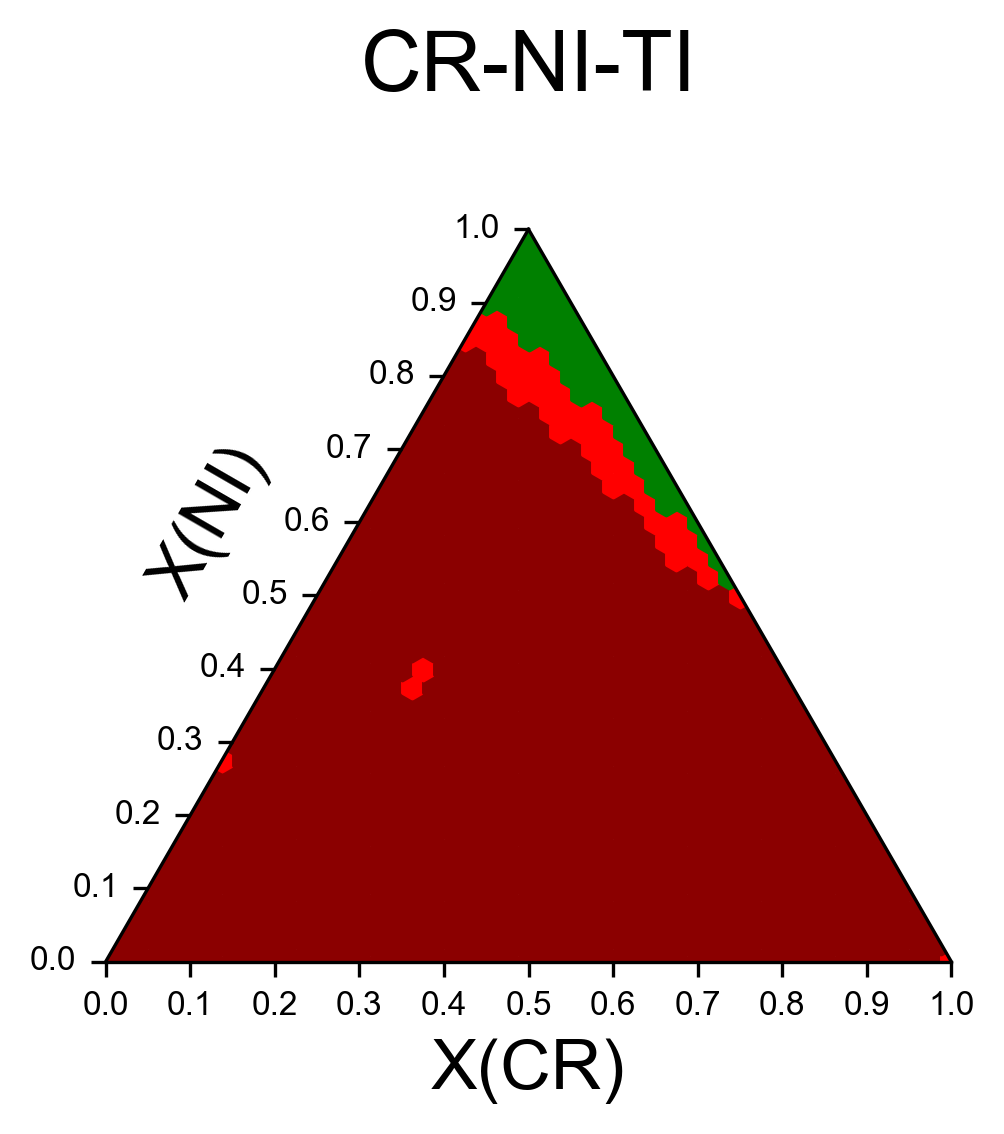

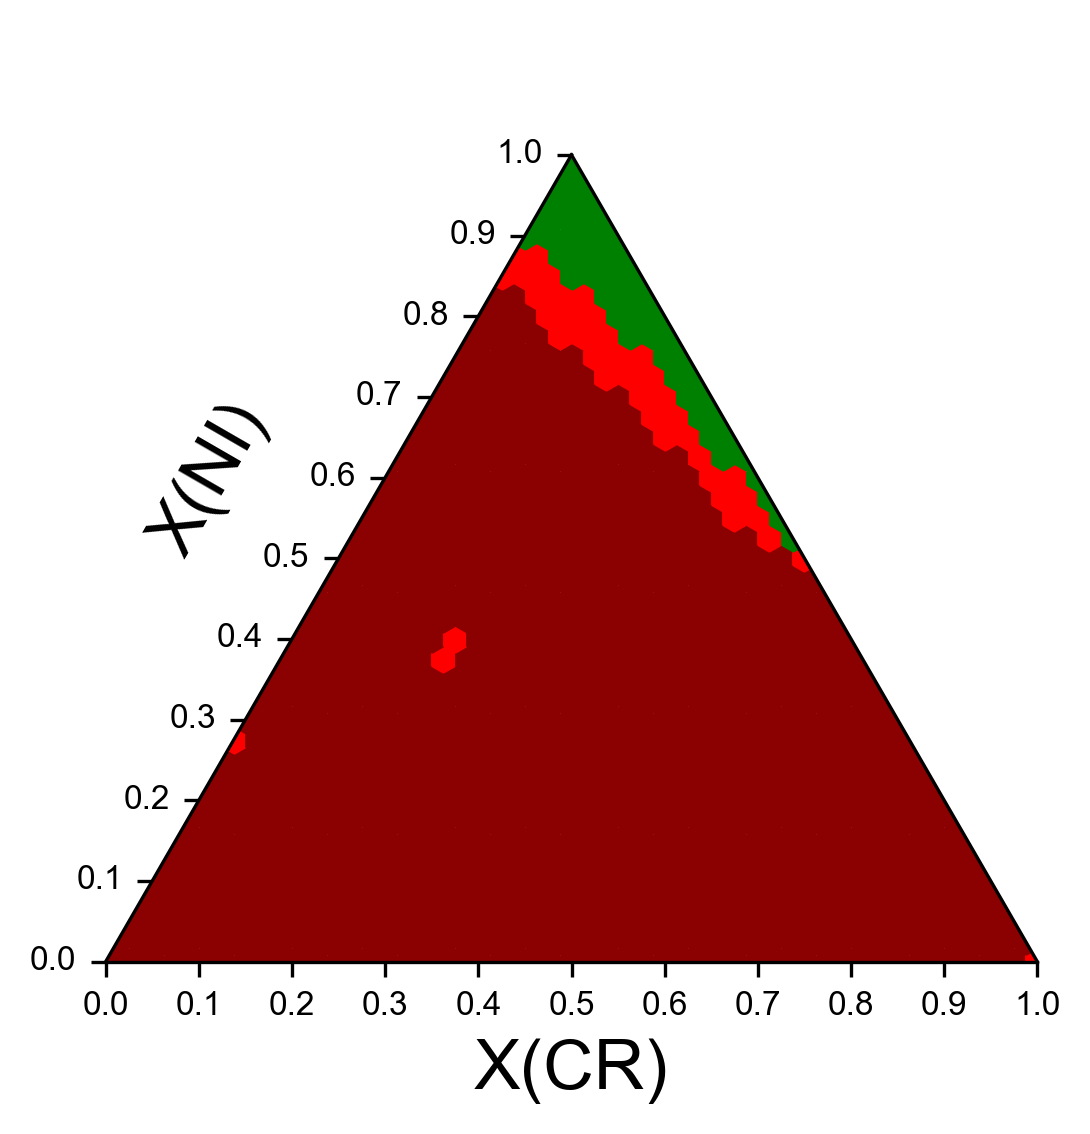

In [12]:
# with title
ax = plot_figure(comps, compositions_list, equilibrium_results, scheil_results, allowed_phases, tolerance_deleterious_phases, scattersize=27)
ax.figure.legends[0].remove()
ax.set_title(f"{'-'.join(sorted(set(comps) - {'VA'}))}")
ax.figure.savefig(os.path.join(OUTDIR, f"{'-'.join(sorted(set(comps) - {'VA'}))}.pdf"), bbox_inches='tight')

# without title
ax = plot_figure(comps, compositions_list, equilibrium_results, scheil_results, allowed_phases, tolerance_deleterious_phases, scattersize=33)
ax.figure.legends[0].remove()
ax.set_title("")
ax.figure.savefig(os.path.join(OUTDIR, f"{'-'.join(sorted(set(comps) - {'VA'}))}-notitle.pdf"), bbox_inches='tight')

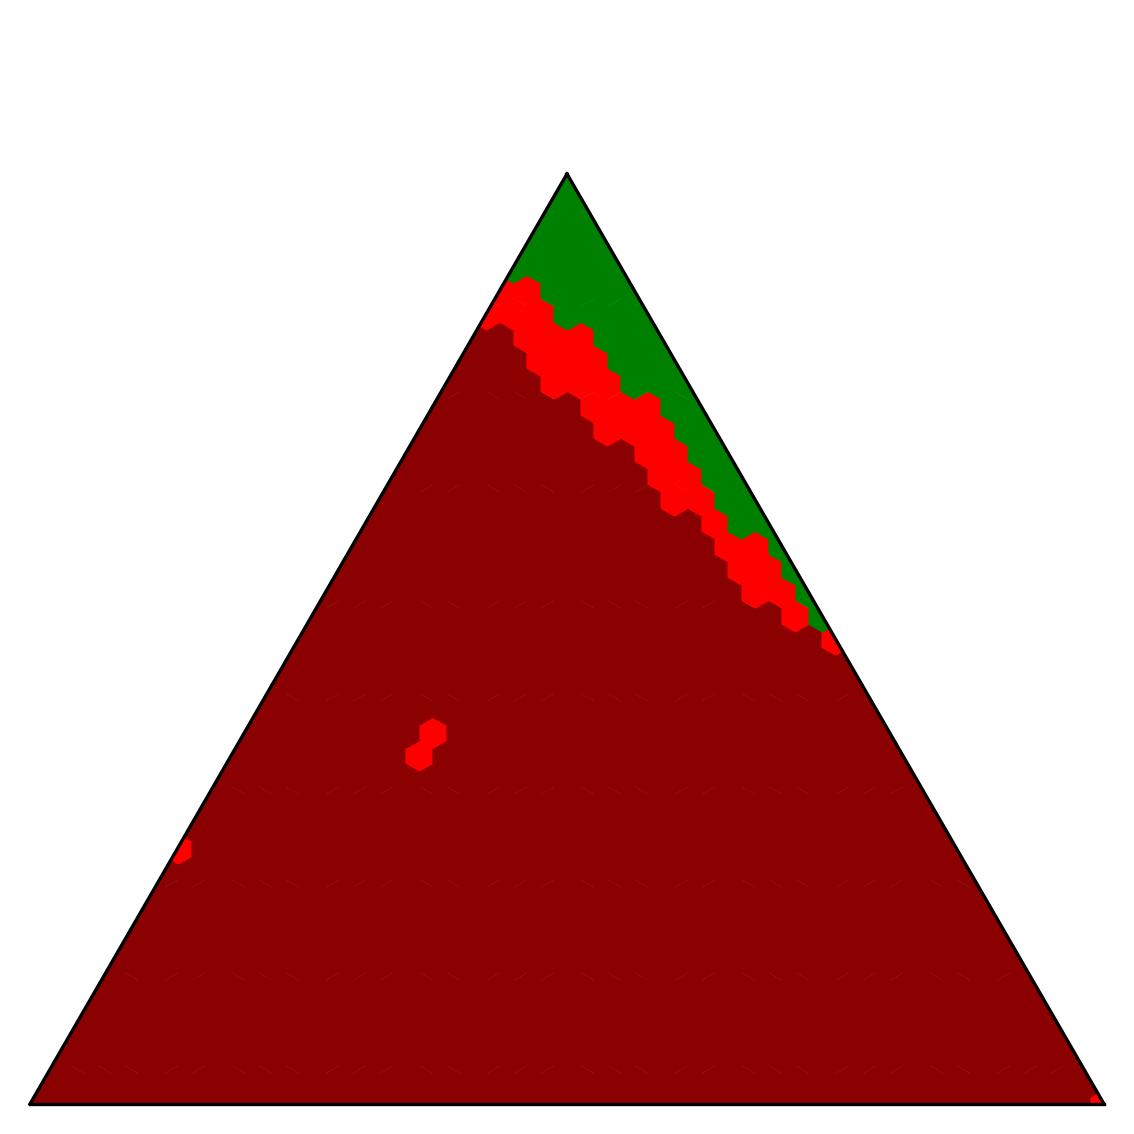

In [13]:
ax = plot_figure(comps, compositions_list, equilibrium_results, scheil_results, allowed_phases, tolerance_deleterious_phases, scattersize=44)
ax.figure.legends[0].remove()
ax.set_title("")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticklabels([])
ax.set_yticks([])
ax.figure.savefig(os.path.join(OUTDIR, f"{'-'.join(sorted(set(comps) - {'VA'}))}-clean.pdf"), bbox_inches='tight')